In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Read data
df_1 = pd.read_excel('is_bot.xlsx', parse_dates=['Timestamp'])
df_2 = pd.read_excel('model_labeled_comments.xlsx', parse_dates=['Timestamp'])
# Merge dataframes
df = df_1.copy()
df['Predicted_Sentiment'] = df_2['Predicted_Sentiment']


# Add Date column if needed (date only)
df['Date'] = df['Timestamp'].dt.date
df['Predicted_Sentiment'] = df['Predicted_Sentiment'].str.lower().str.strip()


df_bot = df[df['is_bot'] == 1]      # is_bot = 1 (yes) 
df_not_bot = df[df['is_bot'] == 0]  # is_bot = 0 (no) 
# Sentiment categorization mapping

category_colors = {
    'positive': '#2E8B57',     # Sea green
    'negative': '#DC143C',     # Crimson
    'neutral': '#808080'       # Gray
}

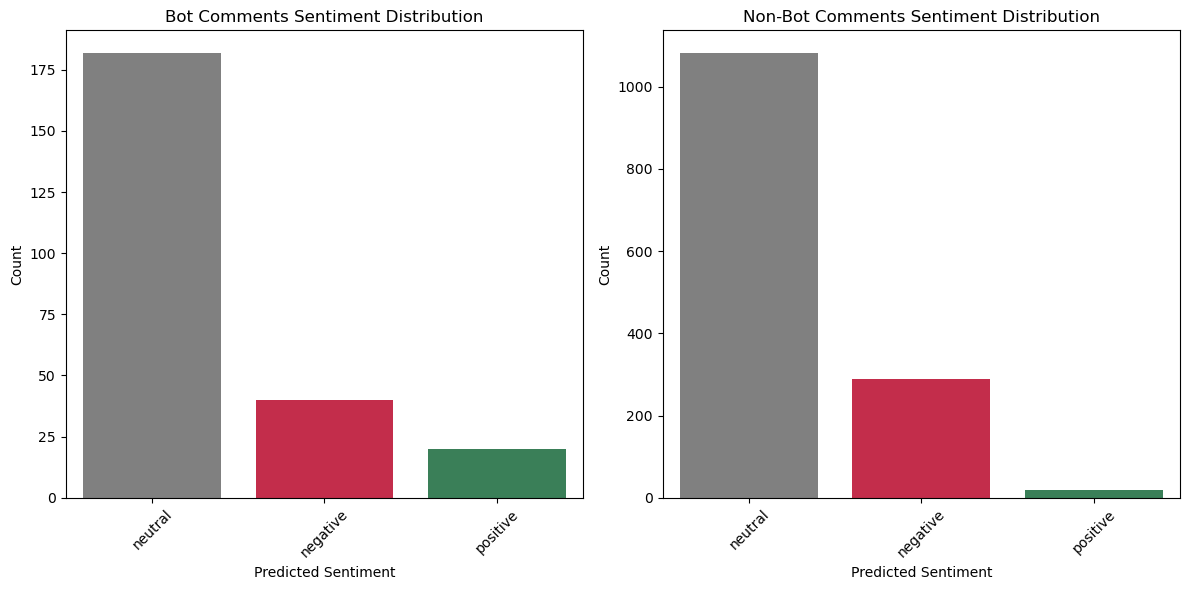

In [2]:
order = ['neutral',  'negative','positive']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=df_bot, x='Predicted_Sentiment', palette=category_colors, order=order)
plt.title('Bot Comments Sentiment Distribution')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
sns.countplot(data=df_not_bot, x='Predicted_Sentiment', palette=category_colors, order=order)
plt.title('Non-Bot Comments Sentiment Distribution')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



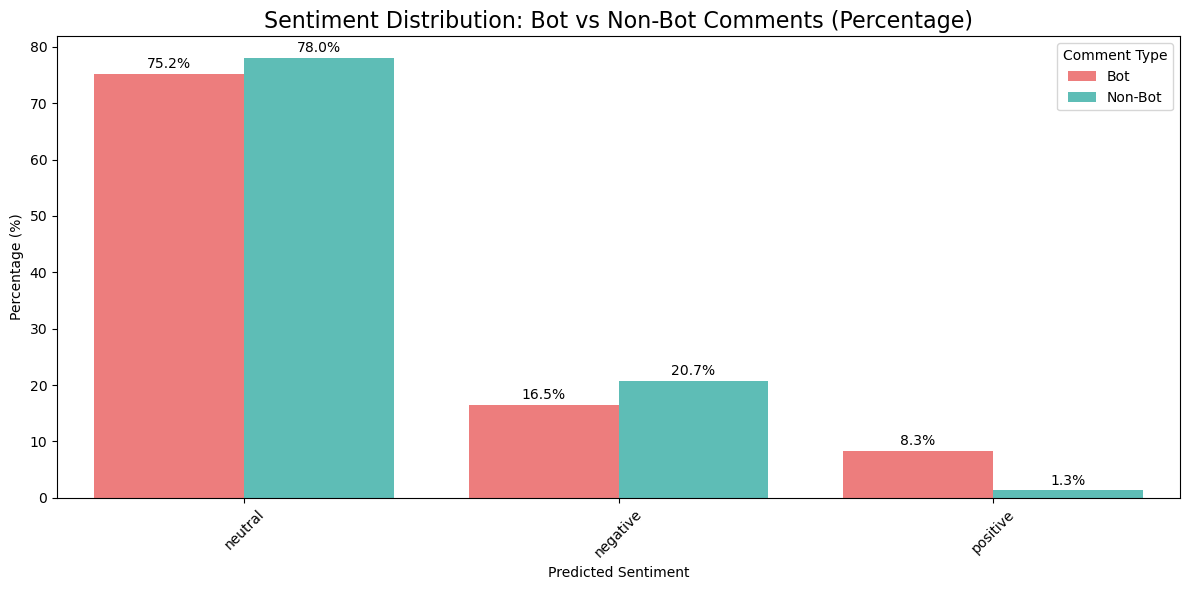

In [3]:
plt.figure(figsize=(12, 6))

# Prepare percentage data
bot_pct = df_bot['Predicted_Sentiment'].value_counts(normalize=True) * 100
not_bot_pct = df_not_bot['Predicted_Sentiment'].value_counts(normalize=True) * 100

# Get all unique sentiments
all_sentiments = list(set(bot_pct.index.tolist() + not_bot_pct.index.tolist()))

# Create dataframe for plotting
pct_data = []
for sentiment in all_sentiments:
    pct_data.append({
        'Sentiment': sentiment,
        'Type': 'Bot',
        'Percentage': bot_pct.get(sentiment, 0)
    })
    pct_data.append({
        'Sentiment': sentiment,
        'Type': 'Non-Bot', 
        'Percentage': not_bot_pct.get(sentiment, 0)
    })

pct_df = pd.DataFrame(pct_data)

# Plot percentage comparison
sns.barplot(data=pct_df, x='Sentiment', y='Percentage', hue='Type', palette=['#FF6B6B', '#4ECDC4'],order=order)
plt.title('Sentiment Distribution: Bot vs Non-Bot Comments (Percentage)',fontsize=16)
plt.xlabel('Predicted Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Comment Type')

# Add percentage labels on bars
for i, bar in enumerate(plt.gca().patches):
    height = bar.get_height()
    if height > 0:
        plt.gca().text(bar.get_x() + bar.get_width()/2., height + 0.5,
                      f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()